In [13]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.5 MB 1.5 MB/s eta 0:00:01
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.11.1
    Uninstalling statsmodels-0.11.1:
      Successfully uninstalled statsmodels-0.11.1
You should consider upgrading via the '/Users/rich/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame



import seaborn as sns
import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller 
from statsmodels.stats.diagnostic import acorr_ljungbox 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.arima_model import ARMA 
from statsmodels.stats.stattools import durbin_watson 
from statsmodels.graphics.api import qqplot 

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.statespace.sarimax import SARIMAX

from math import sqrt


In [25]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/Users/rich/PycharmProjects/GDP_forecast/WEO_Data.csv")
data=data.drop(['Units', 'Scale','Estimates Start After','Unnamed: 51'],axis=1)
data=data.drop([5,6],axis=0)
data.set_index('Country', inplace=True)
data=data.T
year=pd.period_range('1980','2026',freq='Y')
data.index= year
df=data['1980':'2020']
Estimates_data=data['2021':'2026']
print(df)
print(Estimates_data)

Country   China  Germany   India  Japan  United States
1980      7.910    1.272   5.281  3.181         -0.257
1981      5.100    0.110   6.006  4.209          2.538
1982      9.000   -0.788   3.476  3.312         -1.802
1983     10.800    1.555   7.289  3.523          4.584
1984     15.200    2.826   3.821  4.502          7.237
1985     13.501    2.192   5.254  5.233          4.169
1986      8.900    2.417   4.777  3.327          3.463
1987     11.700    1.469   3.965  4.731          3.460
1988     11.200    3.736   9.628  6.785          4.177
1989      4.200    3.913   5.947  4.858          3.673
1990      3.888    5.723   5.534  4.893          1.886
1991      8.401    5.011   1.057  3.417         -0.108
1992     14.234    1.920   5.482  0.848          3.522
1993     14.023   -0.977   4.750 -0.518          2.753
1994     13.031    2.399   6.659  0.876          4.029
1995     11.012    1.541   7.575  2.631          2.684
1996      9.982    0.816   7.550  3.134          3.772
1997      

In [36]:
print((df.isnull()).sum())

Country
China            0
Germany          0
India            0
Japan            0
United States    0
dtype: int64


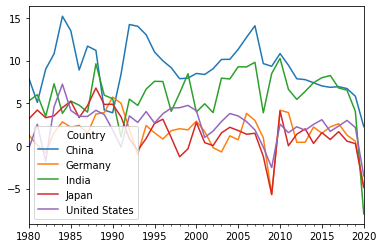

In [37]:
df.plot()
plt.show()

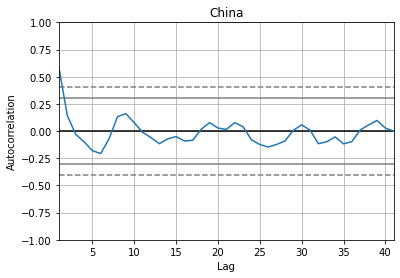

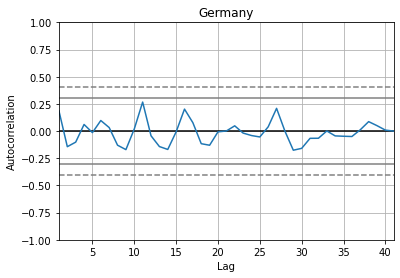

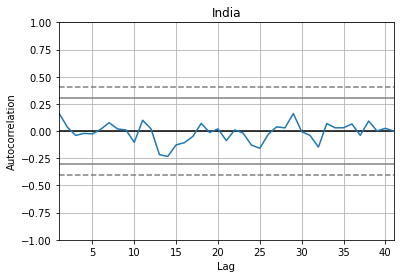

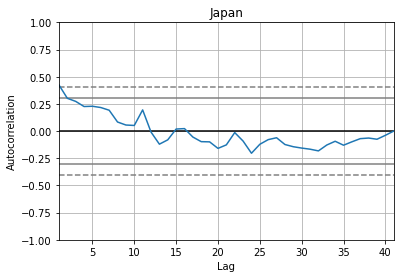

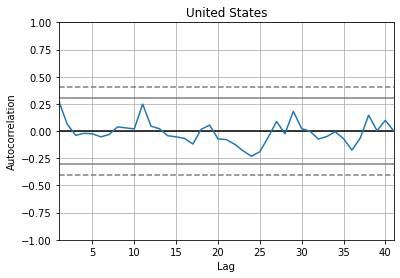

In [38]:
for i in df.columns:
    autocorrelation_plot(df[i])
    plt.title(i)
    plt.show()

                             ARIMA Model Results                              
Dep. Variable:               D2.China   No. Observations:                   39
Model:                 ARIMA(1, 2, 2)   Log Likelihood                 -90.884
Method:                       css-mle   S.D. of innovations              2.326
Date:                Thu, 17 Jun 2021   AIC                            191.769
Time:                        13:57:15   BIC                            200.087
Sample:                    12-31-1982   HQIC                           194.753
                         - 12-31-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0299      0.036     -0.838      0.402      -0.100       0.040
ar.L1.D2.China    -0.7821      0.147     -5.325      0.000      -1.070      -0.494
ma.L1.D2.China -1.609e-08      0.211

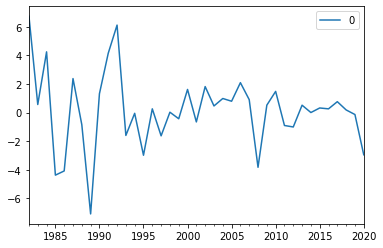

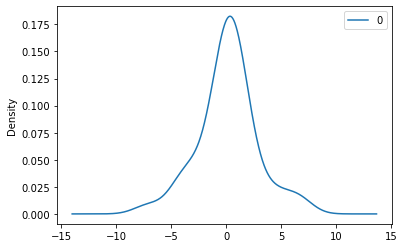

               0
count  39.000000
mean    0.154352
std     2.656598
min    -7.086900
25%    -0.874312
50%     0.263326
75%     1.153268
max     6.739880
                              ARMA Model Results                              
Dep. Variable:                Germany   No. Observations:                   41
Model:                     ARMA(1, 2)   Log Likelihood                 -87.913
Method:                       css-mle   S.D. of innovations              2.062
Date:                Thu, 17 Jun 2021   AIC                            185.826
Time:                        13:57:18   BIC                            194.394
Sample:                    12-31-1980   HQIC                           188.946
                         - 12-31-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.5475      0.339      4.565     

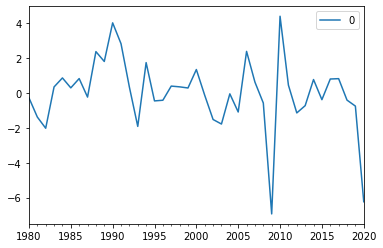

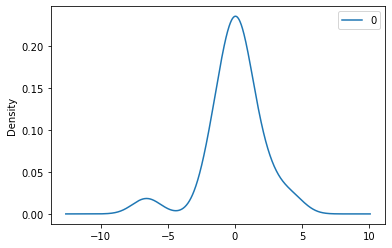

               0
count  41.000000
mean   -0.008943
std     2.088428
min    -6.934906
25%    -0.726952
50%     0.286481
75%     0.821427
max     4.400611
                             ARIMA Model Results                              
Dep. Variable:                D.India   No. Observations:                   40
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -103.491
Method:                           css   S.D. of innovations              3.217
Date:                Thu, 17 Jun 2021   AIC                            210.981
Time:                        13:57:20   BIC                            214.359
Sample:                    12-31-1981   HQIC                           212.203
                         - 12-31-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3312      0.509     -0.651      0.515   

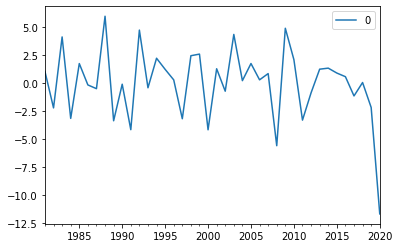

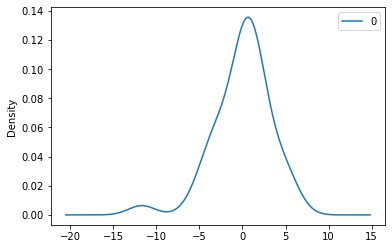

               0
count  40.000000
mean    0.000000
std     3.257591
min   -11.675850
25%    -1.387350
50%     0.308150
75%     1.764900
max     5.994150
                             ARIMA Model Results                              
Dep. Variable:                D.Japan   No. Observations:                   40
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 -84.746
Method:                       css-mle   S.D. of innovations              1.930
Date:                Thu, 17 Jun 2021   AIC                            177.492
Time:                        13:57:26   BIC                            184.248
Sample:                    12-31-1981   HQIC                           179.935
                         - 12-31-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1279      0.031     -4.139     

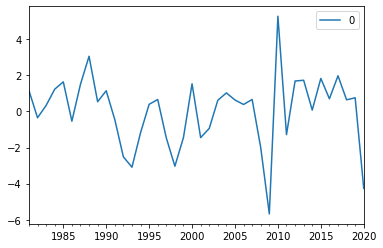

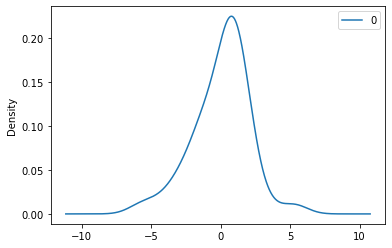

               0
count  40.000000
mean    0.037180
std     2.006463
min    -5.679446
25%    -1.205882
50%     0.577934
75%     1.174901
max     5.275569
                             ARIMA Model Results                              
Dep. Variable:        D.United States   No. Observations:                   40
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 -83.828
Method:                       css-mle   S.D. of innovations              1.889
Date:                Thu, 17 Jun 2021   AIC                            175.656
Time:                        13:57:33   BIC                            182.412
Sample:                    12-31-1981   HQIC                           178.099
                         - 12-31-2020                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0495   

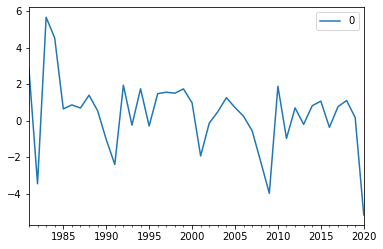

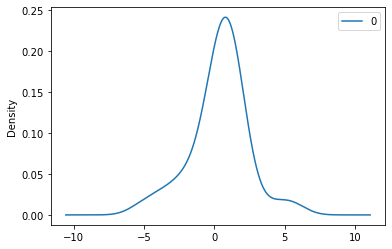

               0
count  40.000000
mean    0.364760
std     2.016451
min    -5.154434
25%    -0.304102
50%     0.700287
75%     1.419789
max     5.667314


In [28]:
order = [(1,2,2),(1,0,2),(0,1,0),(0,1,2),(0,1,2)] 
def ARIMA_model(country_name, order):
    model = ARIMA(df[country_name], order=order)
    model_fit = model.fit()
    # summary of fit model
    print(model_fit.summary())
    # line plot of residuals
    residuals = DataFrame(model_fit.resid)
    residuals.plot()
    plt.show()
    # density plot of residuals
    residuals.plot(kind='kde')
    plt.show()
    # summary stats of residuals
    print(residuals.describe())
for i in range(5):
    ARIMA_model(country_name=df.columns[i], order=order[i])

predicted=13.669168, expected=14.088000
predicted=14.074172, expected=9.651000
predicted=9.015662, expected=9.336000
predicted=9.800093, expected=10.823000
predicted=10.704521, expected=9.467000
predicted=9.093663, expected=7.872000
predicted=7.451325, expected=7.772000
predicted=7.689937, expected=7.408000
predicted=6.844871, expected=7.031000
predicted=6.844203, expected=6.871000
predicted=6.362181, expected=6.946000
predicted=6.823417, expected=6.725000
predicted=6.168093, expected=5.822000
predicted=5.483083, expected=2.270000
Test RMSE: 1.579


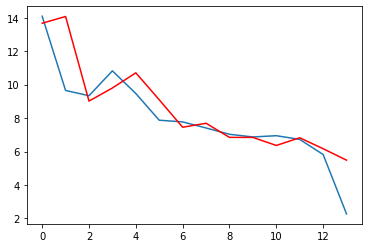

predicted=3.872674, expected=2.982000
predicted=2.657783, expected=0.959000
predicted=-0.605859, expected=-5.696000
predicted=-2.290359, expected=4.185000
predicted=3.545597, expected=3.914000
predicted=2.304798, expected=0.427000
predicted=1.385510, expected=0.432000
predicted=1.642866, expected=2.217000
predicted=2.041032, expected=1.487000
predicted=1.595602, expected=2.230000
predicted=1.938455, expected=2.604000
predicted=1.843943, expected=1.268000
predicted=1.499025, expected=0.555000
predicted=1.540355, expected=-4.903000
Test RMSE: 2.932


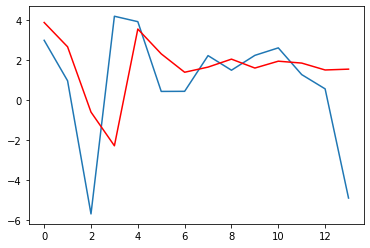

predicted=9.417192, expected=9.801000
predicted=9.968407, expected=3.891000
predicted=3.841357, expected=8.480000
predicted=8.590310, expected=10.260000
predicted=10.425967, expected=6.638000
predicted=6.681774, expected=5.456000
predicted=5.461469, expected=6.386000
predicted=6.419485, expected=7.410000
predicted=7.472618, expected=7.996000
predicted=8.073571, expected=8.256000
predicted=8.338639, expected=6.795000
predicted=6.835919, expected=6.533000
predicted=6.565947, expected=4.042000
predicted=4.010231, expected=-7.965000
Test RMSE: 4.068


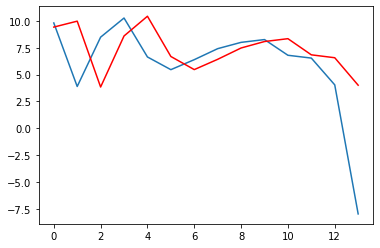

predicted=0.839988, expected=1.484000
predicted=0.793092, expected=-1.224000
predicted=-1.401400, expected=-5.693000
predicted=-3.888564, expected=4.098000
predicted=2.310395, expected=0.024000
predicted=-0.787429, expected=1.375000
predicted=-0.186031, expected=2.005000
predicted=0.021563, expected=0.296000
predicted=-0.401505, expected=1.561000
predicted=0.041703, expected=0.754000
predicted=-0.230556, expected=1.675000
predicted=0.132755, expected=0.559000
predicted=-0.223857, expected=0.270000
predicted=-0.247129, expected=-4.830000
Test RMSE: 3.058


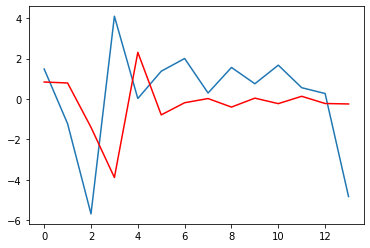

predicted=3.412182, expected=1.876000
predicted=3.021162, expected=-0.137000
predicted=2.089663, expected=-2.537000
predicted=0.676755, expected=2.564000
predicted=2.903929, expected=1.551000
predicted=1.736581, expected=2.249000
predicted=2.257670, expected=1.842000
predicted=1.914460, expected=2.526000
predicted=2.232466, expected=3.076000
predicted=2.369890, expected=1.711000
predicted=1.864015, expected=2.333000
predicted=2.201784, expected=2.997000
predicted=2.352250, expected=2.161000
predicted=2.042110, expected=-3.505000
Test RMSE: 2.280


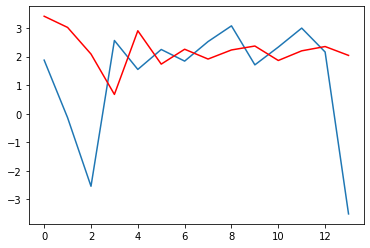

In [29]:
def forecast(X,i):
    X=X.values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=order[i])
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    # evaluate forecasts
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)
    # plot forecasts against actual outcomes
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.show()

for i in range(5):
    X=df[df.columns[i]]
    forecast(X,i)

In [30]:
test_acc = np.zeros(30)
def rmse(pred, actual):
    return np.sqrt(((pred - actual) ** 2).mean())
def evaluate(X,i):
    Best_RMSE = 3000
    X=X.values
    for run in range(30):
        size = int(len(X) * 0.66)
        train, test = X[0:size], X[size:len(X)]
        history = [x for x in train]
        predictions = list()
    # walk-forward validation
        for t in range(len(test)):
            model = ARIMA(history, order=order[i])
            model_fit = model.fit()
            output = model_fit.forecast()
            yhat = output[0]
            predictions.append(yhat)
            obs = test[t]
            history.append(obs)
#           print('predicted=%f, expected=%f' % (yhat, obs))
        # evaluate forecasts
        rmse = sqrt(mean_squared_error(test,predictions))
#       print('Test RMSE: %.3f' % rmse)
        test_acc[run] = rmse
        if test_acc[run] < Best_RMSE:
            Best_RMSE = test_acc[run]
            Best_Predict_Test = predictions
    print("Best_RMSE", test_acc[run],"Best_Predict_Test",predictions)
        
for i in range(5):
    X=df[df.columns[i]]
    evaluate(X,i)


Best_RMSE 1.5794357237267171 Best_Predict_Test [array([13.66916824]), array([14.07417198]), array([9.01566245]), array([9.80009286]), array([10.704521]), array([9.09366329]), array([7.4513248]), array([7.68993723]), array([6.84487126]), array([6.84420295]), array([6.36218065]), array([6.823417]), array([6.1680928]), array([5.48308288])]
Best_RMSE 2.9315002985840506 Best_Predict_Test [array([3.87267378]), array([2.65778282]), array([-0.60585929]), array([-2.29035949]), array([3.54559719]), array([2.30479801]), array([1.38551032]), array([1.64286642]), array([2.04103232]), array([1.59560233]), array([1.93845549]), array([1.84394342]), array([1.49902512]), array([1.54035525])]
Best_RMSE 4.067575662977145 Best_Predict_Test [array([9.41719231]), array([9.96840741]), array([3.84135714]), array([8.59031034]), array([10.42596667]), array([6.68177419]), array([5.46146875]), array([6.41948485]), array([7.47261765]), array([8.07357143]), array([8.33863889]), array([6.83591892]), array([6.56594737